# Whale off the Port(folio)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

## Data Cleaning

### Whale Returns

In [2]:
# Creating Path for csv files
whale_returns = Path("whale_returns.csv")

# Reading files through Pandas
whale_returns = pd.read_csv("whale_returns.csv",index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


### Algorithmic Daily Returns

In [5]:
# Reading algorithmic returns
algo_returns = Path("algo_returns.csv")
algo_returns = pd.read_csv("algo_returns.csv")
algo_returns = pd.read_csv("algo_returns.csv", index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


### S&P TSX 60 Returns

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = Path("sp_tsx_history.csv")
sp_tsx = pd.read_csv("sp_tsx_history.csv", index_col = "Date", infer_datetime_format=True, parse_dates=True)
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx['Close'] = sp_tsx['Close'].str.replace("$","")

/var/folders/dw/59g9zgs92ls9y1tthwxk0vg40000gn/T/ipykernel_56698/1885488634.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx['Close'] = sp_tsx['Close'].str.replace("$","")


In [11]:
sp_tsx['Close'] = sp_tsx['Close'].str.replace(",","")

In [12]:
#convert data into float
sp_tsx['Close'] = sp_tsx['Close'].astype('float')
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
# Calculate Daily Returns
sp_tsx = sp_tsx.pct_change()
sp_tsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx.dropna(inplace=True)
sp_tsx.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx = sp_tsx.rename(columns={
    "Close" : "SP TSX Returns"
})
sp_tsx.head()

,SP TSX Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


### Combined Whale, Algorithmic, and S&P TSX Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame
combined_df = pd.concat([whale_returns, algo_returns, sp_tsx], axis = 'columns', join = 'inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


## Analysis

<AxesSubplot:xlabel='Date'>

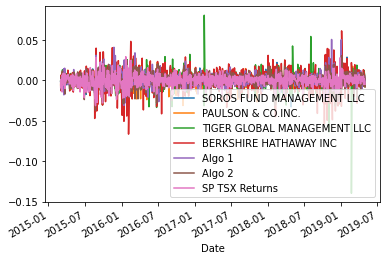

In [17]:
# Plot daily returns of all portfolios
combined_df.plot()

In [18]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1+ combined_df).cumprod()
combined_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

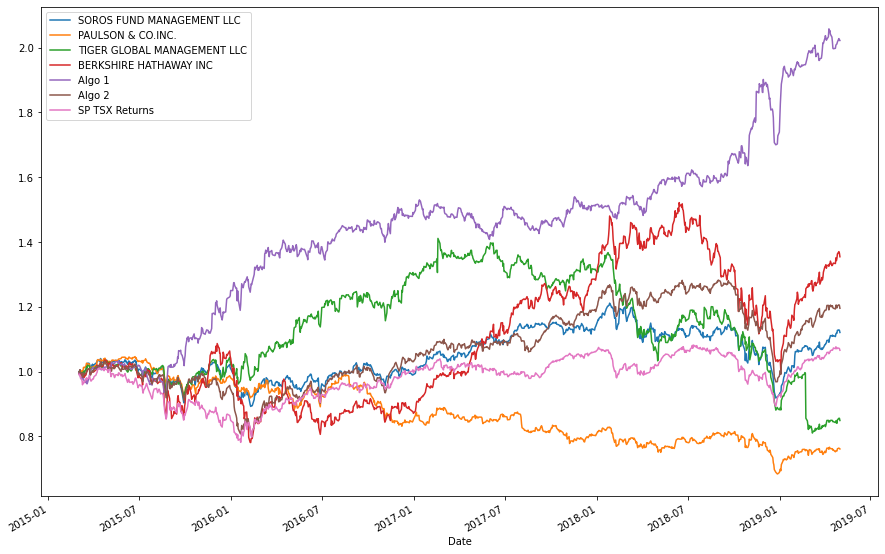

In [19]:
# Plot cumulative returns
combined_cumulative_returns.plot(figsize=(15,10))

### Risk Analysis

<AxesSubplot:title={'center':'Portfolio Risk'}>

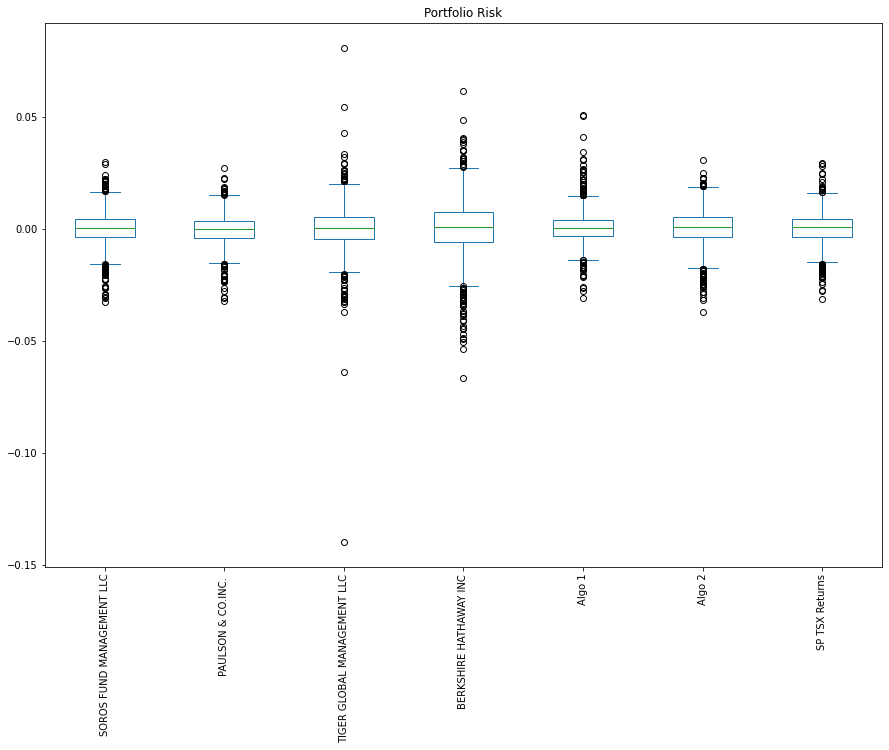

In [20]:
# Box plot to visually show risk
combined_df.plot.box( title="Portfolio Risk", rot=90,figsize=(15,10))

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std_deviation = combined_df.std().sort_values(ascending=False)
daily_std_deviation

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
SP TSX Returns                 0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_std_dev = sp_tsx.std().sort_values(ascending=False)
sp_tsx_daily_std_dev


SP TSX Returns    0.006637
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P TSX 60
risky_portfolio = [daily_std_deviation > daily_std_deviation["SP TSX Returns"]]
risky_portfolio

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 SP TSX Returns                 False
 PAULSON & CO.INC.              False
 dtype: bool]

As per the Risk analysis of stocks data excepts PAULSON & CO. INC. all stocks are riskier than S&P TSX

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_deviation *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
SP TSX Returns                 0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

### Rolling Statistics

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_df.rolling(window=21).std().dropna().copy()
combined_rolling_std.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295


<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

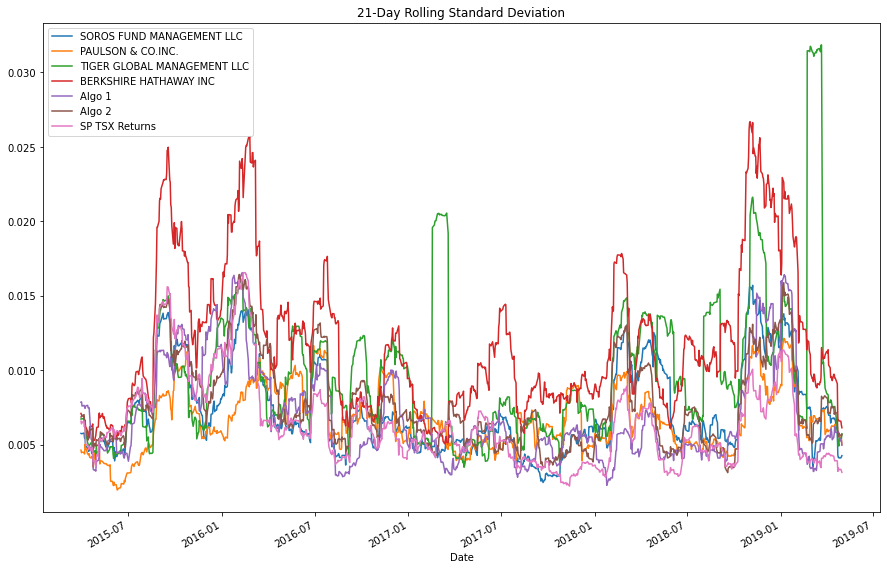

In [26]:
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(title="21-Day Rolling Standard Deviation", figsize=(15,10))

In [27]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

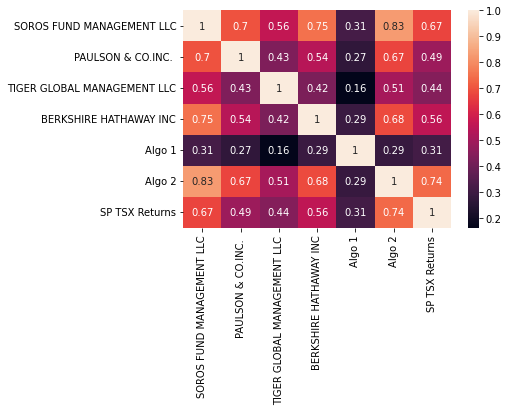

In [28]:
# Display de correlation matrix
sns.heatmap(correlation, annot=True)

PAULSON & CO. INC. seems to mimicking S&P TSX

In [29]:
# Calculate covariance of a single portfolio
whale_returns_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov()
whale_returns_covariance.dropna(inplace=True)
whale_returns_covariance.head()

Date
2015-05-28    0.000041
2015-05-29    0.000041
2015-06-01    0.000040
2015-06-02    0.000040
2015-06-03    0.000037
Name: BERKSHIRE HATHAWAY INC, dtype: float64

In [30]:
# Calculate variance of S&P TSX
variance = combined_df["SP TSX Returns"].rolling(window=60).var()
variance.dropna(inplace=True)
variance.head()

Date
2015-05-28    0.000032
2015-05-29    0.000032
2015-06-01    0.000032
2015-06-02    0.000032
2015-06-03    0.000030
Name: SP TSX Returns, dtype: float64

In [31]:
# Computing beta
whale_returns_beta = whale_returns_covariance / variance
whale_returns_beta.head()

Date
2015-05-28    1.262177
2015-05-29    1.278035
2015-06-01    1.270018
2015-06-02    1.246449
2015-06-03    1.210080
dtype: float64

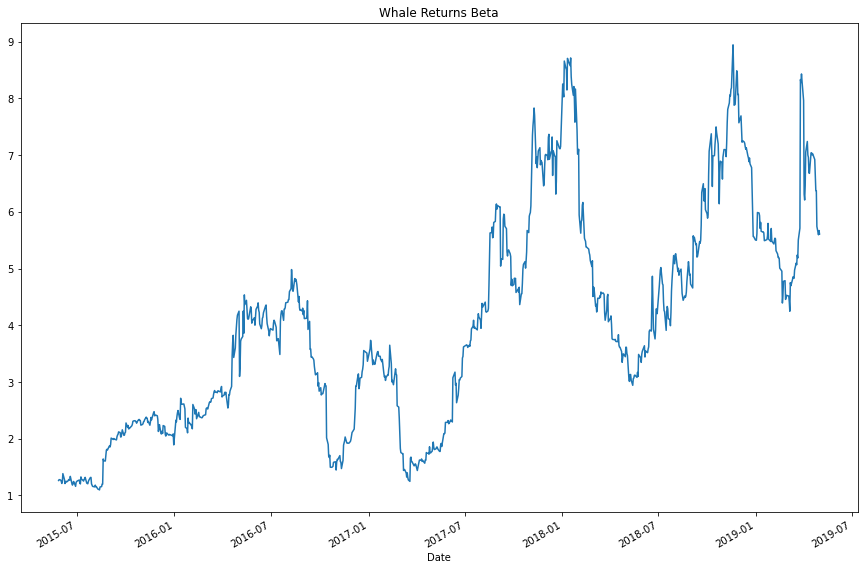

In [32]:
# Plot beta trend
whale_returns_beta_plot = whale_returns_beta.plot(title="Whale Returns Beta", figsize=(15,10))

In [33]:
# Use `ewm` to calculate the rolling window
rolling_statistics = combined_df.ewm(halflife=21, adjust=True).mean()
rolling_statistics.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436


## Sharpe Ratio

In [34]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX Returns                 0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

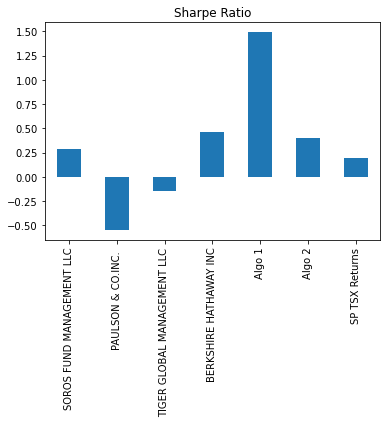

In [35]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratio")

Algorithmic Strategies outperfoms both S&P TSX and WHales Portfolios

# Custom Portfolio

In [36]:
# Reading and sorting data from Algin Technology stock
align_technology_data = Path("align_technology.csv")
alg = pd.read_csv(align_technology_data, index_col = "Date", infer_datetime_format=True, parse_dates=True)
alg = alg.rename(columns={
    "Close" : "Align Technology"

})
alg.head()

,Align Technology
Date,
2012-03-01,23.95
2012-04-01,24.41
2012-05-01,24.19
2012-06-01,23.71
2012-09-01,22.67


In [37]:
# Reading and sorting data from United Rentals Inc stock
united_rentals_data = Path("united_rentals.csv")
uri = pd.read_csv(united_rentals_data, index_col = "Date", infer_datetime_format=True, parse_dates=True)
uri = uri.rename(columns={
    "Close" : "United Rentals Inc"

})
uri.head()

,United Rentals Inc
Date,
2012-03-01,28.96
2012-04-01,29.78
2012-05-01,29.93
2012-06-01,29.63
2012-09-01,29.47


In [38]:
# Reading and sorting data MarketAxess Holdings from  stock
market_axess_data = Path("marketaxess_holdings.csv")
mah = pd.read_csv(market_axess_data, index_col = "Date", infer_datetime_format=True, parse_dates=True)
mah = mah.rename(columns={
    "Close" : "MarketAxess Holdings"

})
mah.head()

,MarketAxess Holdings
Date,
2012-03-01,29.26
2012-04-01,30.01
2012-05-01,31.10
2012-06-01,30.88
2012-09-01,31.71


In [39]:
# Combine all stocks
combined_custom = pd.concat([alg, mah, uri], axis = 'columns', join = 'inner')
combined_custom.head()

,Align Technology,MarketAxess Holdings,United Rentals Inc
Date,,,
2012-03-01,23.95,29.26,28.96
2012-04-01,24.41,30.01,29.78
2012-05-01,24.19,31.10,29.93
2012-06-01,23.71,30.88,29.63
2012-09-01,22.67,31.71,29.47


In [40]:
# Calculating Daily Returns
combined_returns = combined_custom.pct_change()
combined_returns.head()

,Align Technology,MarketAxess Holdings,United Rentals Inc
Date,,,
2012-03-01,NaN,NaN,NaN
2012-04-01,0.019207,0.025632,0.028315
2012-05-01,-0.009013,0.036321,0.005037
2012-06-01,-0.019843,-0.007074,-0.010023
2012-09-01,-0.043863,0.026878,-0.005400


In [41]:
# Drop null
combined_returns.dropna(inplace=True)
combined_returns.head()

,Align Technology,MarketAxess Holdings,United Rentals Inc
Date,,,
2012-04-01,0.019207,0.025632,0.028315
2012-05-01,-0.009013,0.036321,0.005037
2012-06-01,-0.019843,-0.007074,-0.010023
2012-09-01,-0.043863,0.026878,-0.005400
2012-10-01,0.029113,0.014191,0.065830


In [42]:
# Calculate weighted returns by setting equal weights
weights = [1/3, 1/3, 1/3]
combined_weighted_returns = combined_returns.dot(weights)
combined_weighted_returns = combined_weighted_returns.rename("My Portfolio")
combined_weighted_returns.head()


Date
2012-04-01    0.024385
2012-05-01    0.010782
2012-06-01   -0.012313
2012-09-01   -0.007462
2012-10-01    0.036378
Name: My Portfolio, dtype: float64

# Combine all Portfoloio returns

In [43]:
# Combining all portfolio returns
all_portfolio = pd.concat([whale_returns, algo_returns, sp_tsx, combined_weighted_returns], axis='columns', join='inner')
all_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.008224
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,0.001688
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.001024
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655,0.006485
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139,-0.005189


In [44]:
# Calculate the annualized standard deviation & plot of rolling standard deviation for 21 day window
combined_std_deviation = all_portfolio.std().sort_values(ascending=False)
combined_std_deviation.head()


My Portfolio                   0.014837
BERKSHIRE HATHAWAY INC         0.013046
TIGER GLOBAL MANAGEMENT LLC    0.010141
Algo 2                         0.008448
SOROS FUND MANAGEMENT LLC      0.008006
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

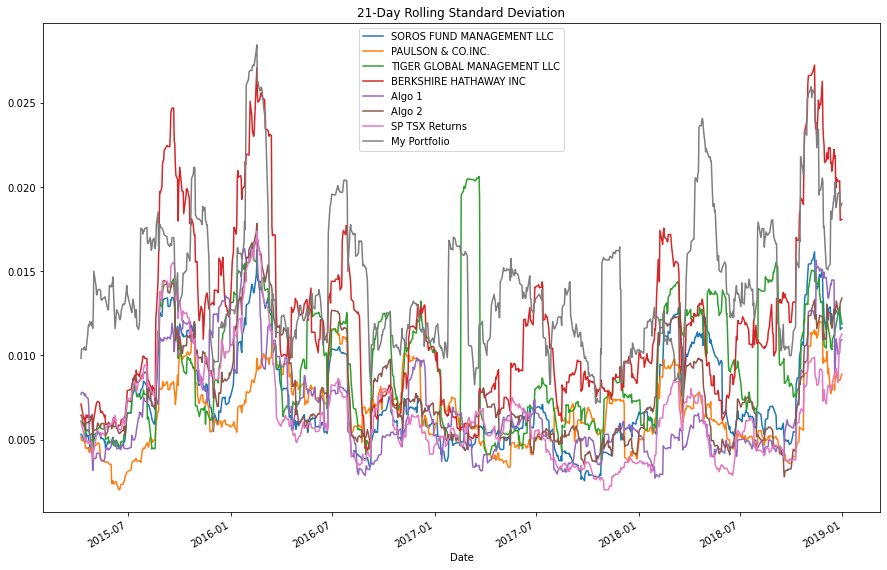

In [45]:
all_portfolio.rolling(window=21).std().plot(title='21-Day Rolling Standard Deviation', figsize=(15,10))

In [46]:
#calculate and plot correlation
all_correlation = all_portfolio.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX Returns,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.703507,0.618063,0.757238,0.331362,0.836280,0.682551,0.462493
PAULSON & CO.INC.,0.703507,1.000000,0.488805,0.557152,0.282215,0.694402,0.526738,0.357280
TIGER GLOBAL MANAGEMENT LLC,0.618063,0.488805,1.000000,0.482775,0.187972,0.579041,0.494011,0.337785
BERKSHIRE HATHAWAY INC,0.757238,0.557152,0.482775,1.000000,0.318164,0.688335,0.564257,0.378118
Algo 1,0.331362,0.282215,0.187972,0.318164,1.000000,0.289298,0.328824,0.161034
Algo 2,0.836280,0.694402,0.579041,0.688335,0.289298,1.000000,0.746065,0.491985
SP TSX Returns,0.682551,0.526738,0.494011,0.564257,0.328824,0.746065,1.000000,0.425371
My Portfolio,0.462493,0.357280,0.337785,0.378118,0.161034,0.491985,0.425371,1.000000


<AxesSubplot:>

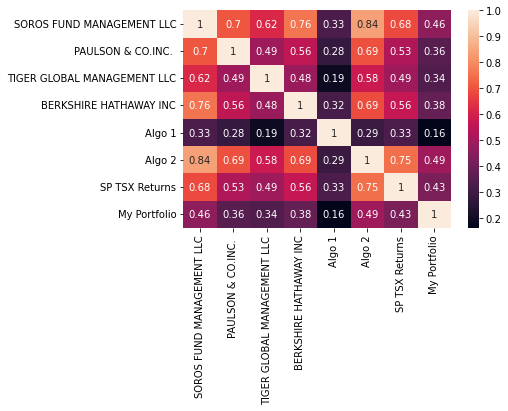

In [47]:
# Plot correlation
sns.heatmap(all_correlation, annot=True)

In [48]:
# Calculate and plot 60 day rolling beta in comparison with S&P 60 TSX
custom_covariance = all_portfolio['My Portfolio'].rolling(window=60).cov()
custom_covariance.dropna(inplace=True)
custom_covariance.head()

Date
2015-06-11    0.000148
2015-06-15    0.000148
2015-06-16    0.000147
2015-06-17    0.000147
2015-06-18    0.000148
Name: My Portfolio, dtype: float64

In [49]:
# calculating variance of S&P TSX
custom_variance = all_portfolio['SP TSX Returns'].rolling(window=60).var()
custom_variance.dropna(inplace=True)
custom_variance.head()

Date
2015-06-11    0.000033
2015-06-15    0.000032
2015-06-16    0.000030
2015-06-17    0.000030
2015-06-18    0.000029
Name: SP TSX Returns, dtype: float64

In [50]:
# Calculating Beta
custom_beta = custom_covariance / custom_variance
custom_beta.head()

Date
2015-06-11    4.462319
2015-06-15    4.604945
2015-06-16    4.842297
2015-06-17    4.955655
2015-06-18    5.090523
dtype: float64

<AxesSubplot:xlabel='Date'>

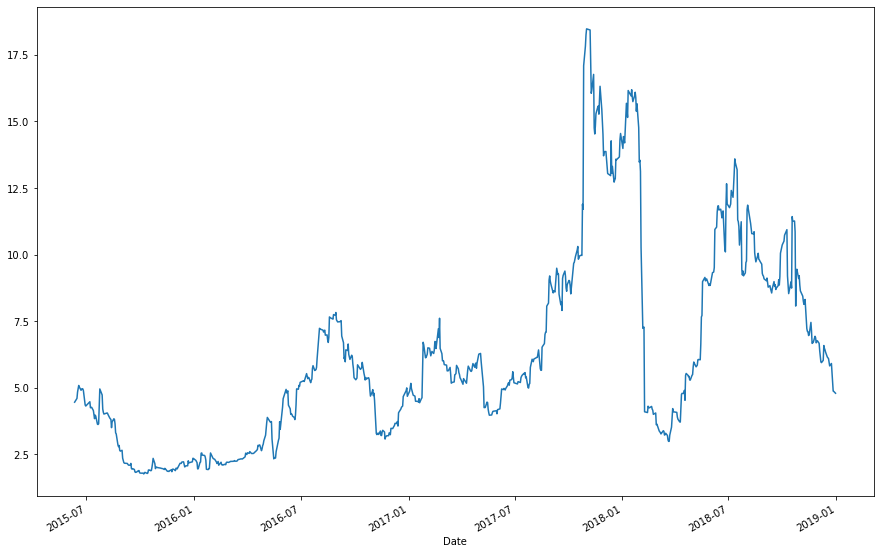

In [51]:
# Plot beta
custom_beta.plot(figsize=(15,10))

In [52]:
# Calculating Annualized Sharpe Ratio
custom_sharpe = (all_portfolio.mean() * 252) / (all_portfolio.std() * np.sqrt(252))
custom_sharpe

SOROS FUND MANAGEMENT LLC     -0.353352
PAULSON & CO.INC.             -1.019275
TIGER GLOBAL MANAGEMENT LLC    0.016510
BERKSHIRE HATHAWAY INC        -0.214667
Algo 1                         1.222911
Algo 2                        -0.179684
SP TSX Returns                -0.263436
My Portfolio                   0.606864
dtype: float64

<AxesSubplot:>

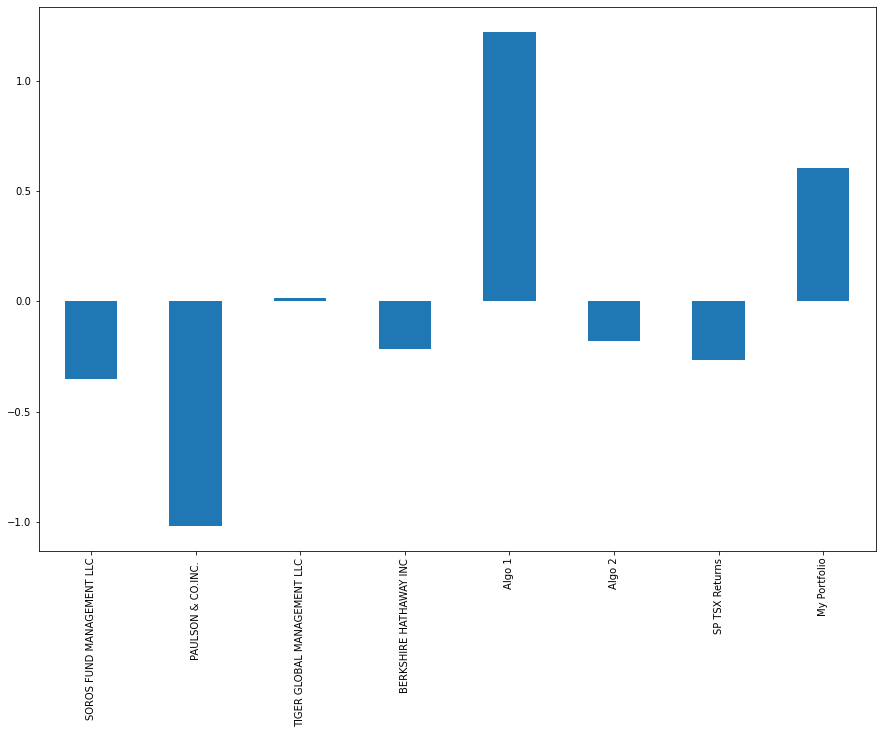

In [53]:
# Bar plot of Sharpe Ratio
custom_sharpe.plot(kind='bar', figsize=(15,10))

As per the plot above it seems like our custom portfolio outprtforms all shares excepts Algo 1 shares